In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__



'2.8.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the MNIST dataset

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


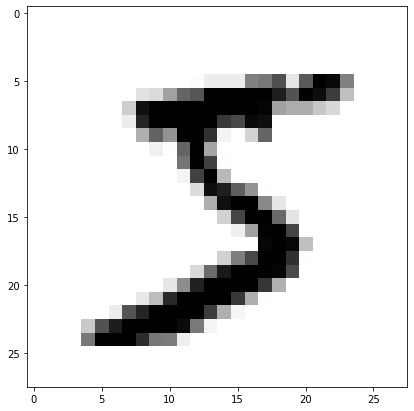

In [4]:
plt.figure(figsize = (7,7))
plt.imshow(X_train[0], cmap = 'binary')

In [5]:
# Normalizing the data and dividing the training data into train and validation set/
X_valid, X_train = X_train[:5000]/255, X_train[5000:]/255
X_test = X_test/255

y_valid, y_train = y_train[:5000], y_train[5000:]

In [6]:
# in this cell we are defining the layers architecture for our model

LAYERS = [
          keras.layers.Flatten(input_shape = [28,28], name = 'inputLayer'),
          keras.layers.Dense(300, activation = 'relu'),
          keras.layers.Dense(100, activation = 'relu'),
          keras.layers.Dense(10, activation = 'softmax')
]

In [7]:
model_classifier = keras.models.Sequential(LAYERS)
model_classifier.layers

In [8]:
model_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
weights, biases = model_classifier.layers[1].get_weights()
weights.shape

(784, 300)

### If you imagine above cell output, it is from every input is connected to 300 other neurons, so there are 784 inputs and then they go into 300 neurons of next layer, that is how we get this (784,300) shape.

In [10]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["ACCURACY"]
EPOCHS = 10
VALIDATION = (X_valid, y_valid)

In [11]:
model_classifier.compile(loss= LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

In [12]:
model_classifier.fit(X_train, y_train, epochs = EPOCHS, validation_data= VALIDATION, batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6085 - ACCURACY: 0.8437 - val_loss: 0.3055 - val_ACCURACY: 0.9146
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2873 - ACCURACY: 0.9168 - val_loss: 0.2358 - val_ACCURACY: 0.9332
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2351 - ACCURACY: 0.9331 - val_loss: 0.2072 - val_ACCURACY: 0.9452
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2014 - ACCURACY: 0.9427 - val_loss: 0.1782 - val_ACCURACY: 0.9512
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1759 - ACCURACY: 0.9491 - val_loss: 0.1586 - val_ACCURACY: 0.9586
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1562 - ACCURACY: 0.9557 - val_loss: 0.1433 - val_ACCURACY: 0.9614
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1396 - ACCURACY: 0.9603 - val_loss: 0.1346 - val_ACCURACY:

##  1719 is number of iterations and in every epoch model will see all 55000 points but in 1719 forward and backward passes.

1719 as if we divide 55000/32(which is batch size 32).

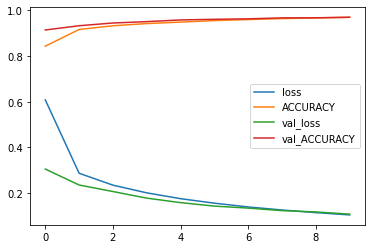

In [16]:
pd.DataFrame(model_classifier.history.history).plot()

In [17]:
# it will print loss and accuracy score
model_classifier.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1102 - ACCURACY: 0.9662


[0.11023960262537003, 0.9661999940872192]

In [18]:
model_classifier.predict(X_test[:5])

array([[2.5915368e-05, 1.4917508e-07, 7.1292248e-04, 2.5479812e-03,
        2.6192834e-07, 2.5720534e-05, 3.4468821e-09, 9.9635810e-01,
        1.0916434e-05, 3.1799095e-04],
       [6.3325300e-05, 4.6599333e-05, 9.9641138e-01, 2.3916438e-03,
        5.4475358e-09, 5.7802099e-04, 2.9602449e-04, 1.8423677e-08,
        2.1293416e-04, 1.0099824e-09],
       [3.2567208e-05, 9.9130636e-01, 1.8123626e-03, 4.8420808e-04,
        4.1601574e-04, 5.9029355e-04, 1.0098969e-03, 2.4852145e-03,
        1.5769928e-03, 2.8598847e-04],
       [9.9942797e-01, 9.9238100e-08, 1.5709852e-04, 1.6872504e-05,
        1.4110800e-06, 4.6112680e-05, 1.3557627e-04, 1.3111861e-04,
        2.5049674e-06, 8.1288796e-05],
       [1.6712547e-04, 7.4988384e-07, 1.4991821e-04, 6.3011015e-05,
        9.7274858e-01, 3.1651452e-04, 2.1022730e-04, 9.6058985e-04,
        9.6676384e-05, 2.5286593e-02]], dtype=float32)

In [21]:
model_classifier.predict(X_test[:5]).round(3)

array([[0.   , 0.   , 0.001, 0.003, 0.   , 0.   , 0.   , 0.996, 0.   ,
        0.   ],
       [0.   , 0.   , 0.996, 0.002, 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.991, 0.002, 0.   , 0.   , 0.001, 0.001, 0.002, 0.002,
        0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.973, 0.   , 0.   , 0.001, 0.   ,
        0.025]], dtype=float32)

In [24]:
np.argmax(model_classifier.predict(X_test[:5]), axis = 1)

array([7, 2, 1, 0, 4])

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)